In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv("churn_dataset (1).csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Checking Null Values

In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data["TotalCharges"]= data["TotalCharges"].replace(" ",np.nan)

# Changing Data Type

In [9]:
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [10]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
data = data.dropna()
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Univariant Non- Visualization Anlaysis of Senior Citizen Column

In [26]:
print("max = ",data["SeniorCitizen"].max())
print("min = ",data["SeniorCitizen"].min())
print("mean = ",data["SeniorCitizen"].mean())
print("median = ",data["SeniorCitizen"].median())
print("standard deviation = ",data["SeniorCitizen"].std())

max =  1
min =  0
mean =  0.16240045506257111
median =  0.0
standard deviation =  0.3688439967571208


# Univariant Visualization Numerical Anlaysis of Senior Citizen Column

<AxesSubplot:>

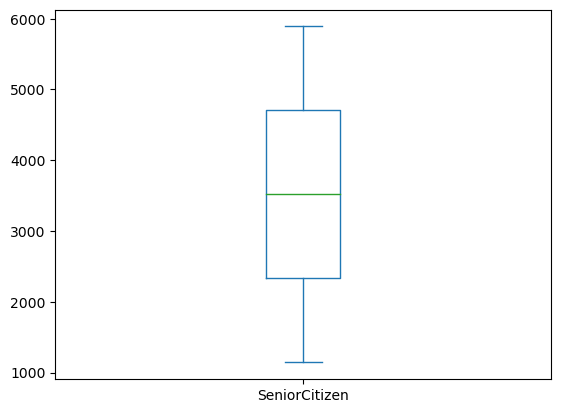

In [27]:
data["SeniorCitizen"].value_counts().plot(kind="box")

`Insights :From the above polt We can observe that there is no outliers in SeniorCitizen column.`

# Checking Distribution of Senior Citizen Columns

<AxesSubplot:ylabel='Density'>

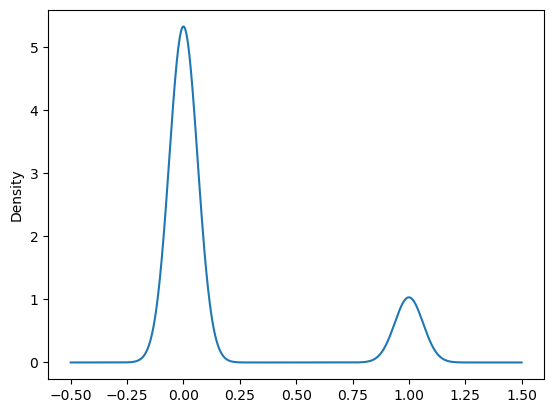

In [29]:
data["SeniorCitizen"].plot(kind="kde")

`Insights :From the above polt We Can Observe that the distribution is not symmetric distributed`

# Univariant Non- Visualization Anlaysis of Tenure Column

In [13]:
print("max = ",data["tenure"].max())
print("min = ",data["tenure"].min())
print("mean = ",data["tenure"].mean())
print("median= ",data["tenure"].median())
print("standard deviation = ",data["tenure"].std())

max =  72
min =  1
mean =  32.421786120591584
median=  29.0
standard deviation =  24.545259709263192


# Univariant Visualization Numerical Anlaysis of Tenure Column

<AxesSubplot:>

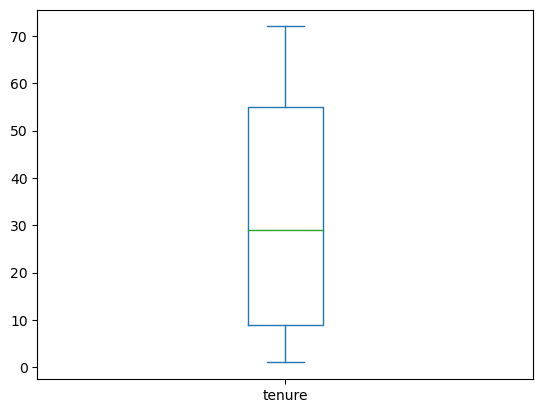

In [15]:
data["tenure"].plot(kind="box")

`Insights :From the above polt We can observe that there is no outliers in tenure column.`

# Checking Distribution of Tenure  Columns

<AxesSubplot:ylabel='Density'>

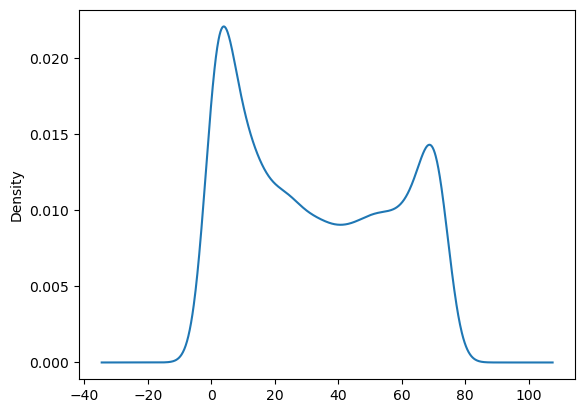

In [18]:
data["tenure"].plot(kind ="kde")

`Insights :From the above polt We Can Observe that the distribution is not symmetric distributed`

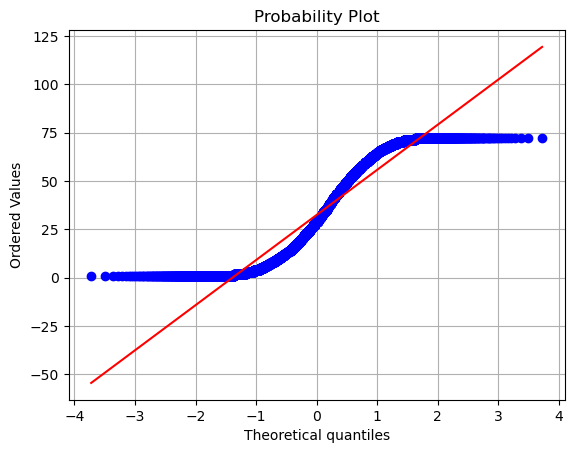

In [21]:
stats.probplot(data["tenure"],dist ="norm",plot = plt)
plt.grid()

`Insights:From the above polt We can observe that tenure column is not normally distributed.`

# Univariant Non- Visualization Anlaysis of Monthly Charges Column

In [23]:
print("max = ",data["MonthlyCharges"].max())
print("min = ",data["MonthlyCharges"].min())
print("mean = ",data["MonthlyCharges"].mean())
print("median = ",data["MonthlyCharges"].median())
print("Standard deviation = ",data["MonthlyCharges"].std())

max =  118.75
min =  18.25
mean =  64.79820819112632
median =  70.35
Standard deviation =  30.08597388404983


# Univariant Visualization Numerical Anlaysis of Monthly Charges Column

<AxesSubplot:>

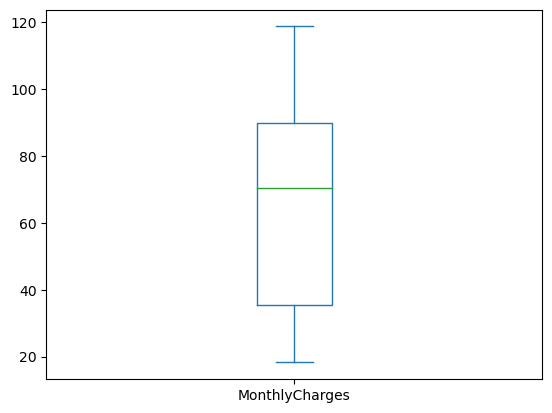

In [25]:
data["MonthlyCharges"].plot(kind= "box")

`Insights :From the above polt We can observe that there is no outliers in Monthly Charges column.`

# Monthly Charges Columns

<AxesSubplot:ylabel='Density'>

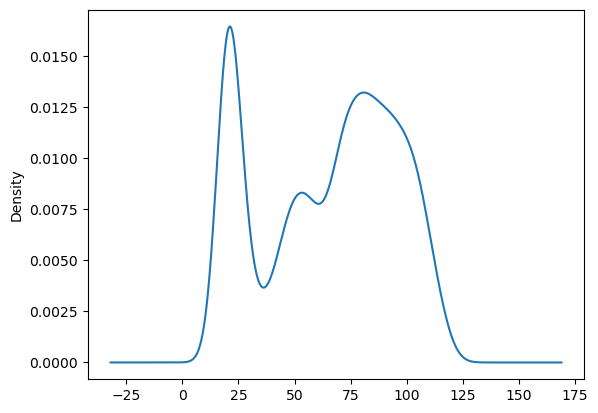

In [27]:
data["MonthlyCharges"].plot(kind = "kde")

`Insights :From the above polt We Can Observe that the distribution is not symmetric distributed.`

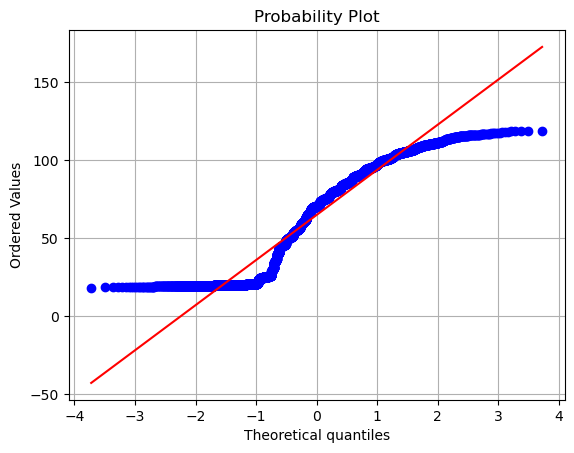

In [29]:
stats.probplot(data["MonthlyCharges"],dist = "norm",plot = plt)
plt.grid()

`Insights:From the above polt We can observe that Monthly Charges column is not normally distributed.`

# Univariant Non- Visualization Anlaysis of Total Charges Column

In [31]:
print("max = ",data["TotalCharges"].max())
print("min = ",data["TotalCharges"].min())
print("mean = ",data["TotalCharges"].mean())
print("median = ",data["TotalCharges"].median())
print("standard deviation = ",data["TotalCharges"].std())

max =  8684.8
min =  18.8
mean =  2283.3004408418697
median =  1397.475
standard deviation =  2266.7713618831453


# Univariant Visualization Numerical Anlaysis of Total Charges Column

<AxesSubplot:>

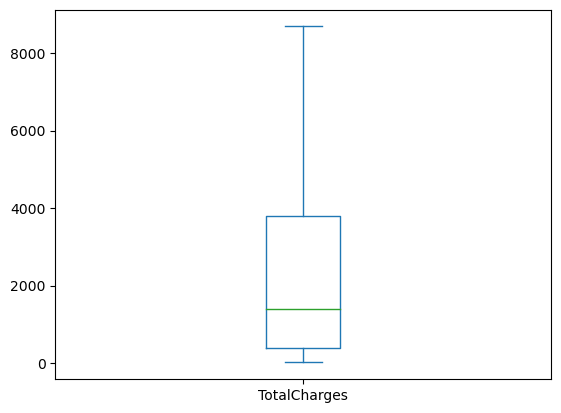

In [33]:
data["TotalCharges"].plot(kind = "box")

`Insights :From the above polt We can observe that there is no outliers in Total Charges column.`

# Checking Distribution of TotalCharges Columns

<AxesSubplot:ylabel='Density'>

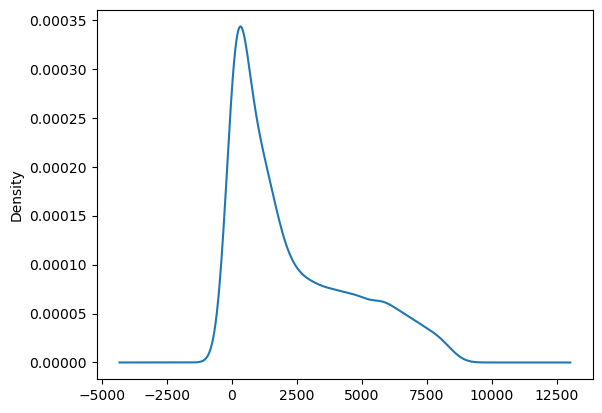

In [35]:
data["TotalCharges"].plot(kind = "kde")

`Insights :From the above polt We Can Observe that the distribution is not symmetric distributed`

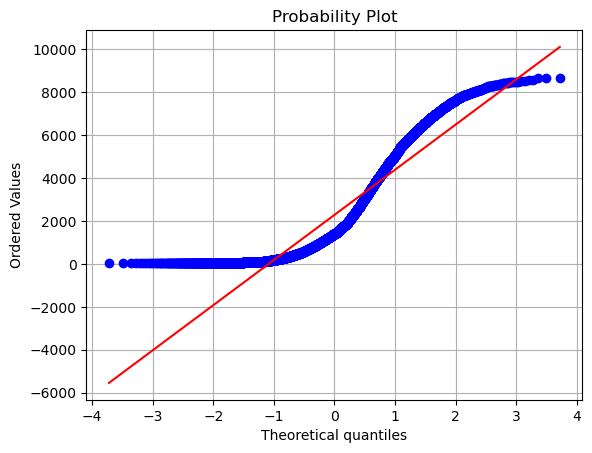

In [37]:
stats.probplot(data["TotalCharges"],dist = "norm",plot = plt)
plt.grid()

`Insights:From the above polt We can observe that Monthly Charges column is not normally distributed.`

# Univariant Visualization Anlaysis of Categorical Columns

In [39]:
def univariant(i):
    if i.dtypes == object:
        i.value_counts().plot(kind = "bar")
    else :
        i.value_counts().plot(kind = "hist")

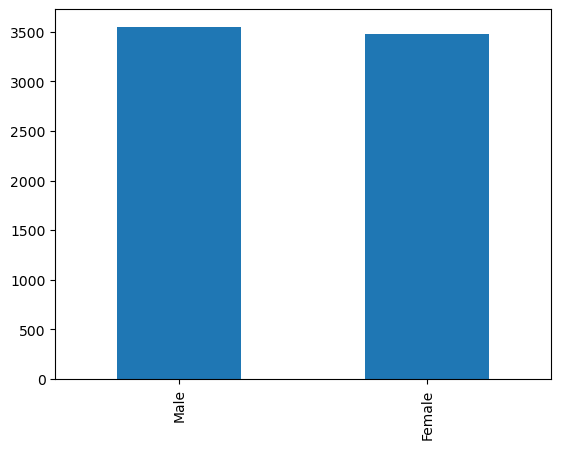

In [41]:
univariant(data["gender"])

`Insights :From the above polt We can observe that most of the males are higher compare to females`

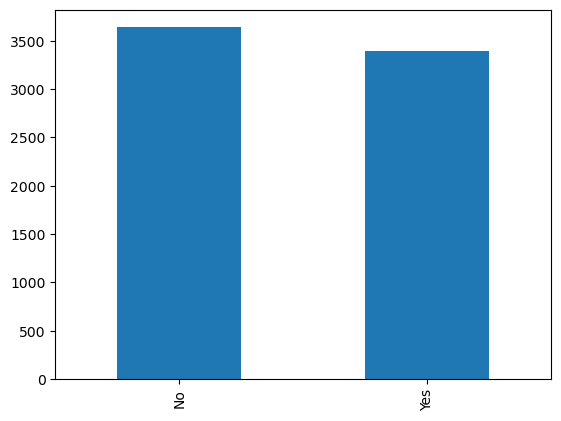

In [44]:
univariant(data["Partner"])

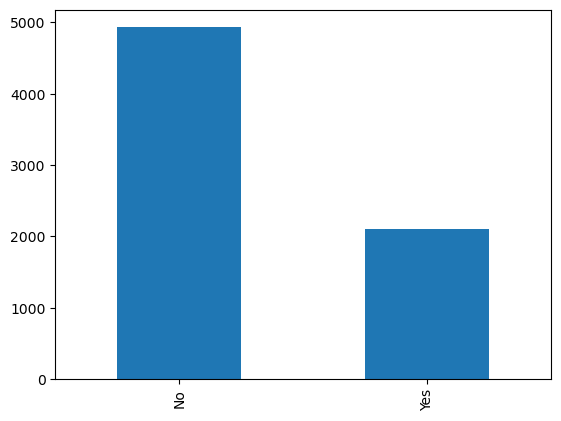

In [46]:
univariant(data["Dependents"])

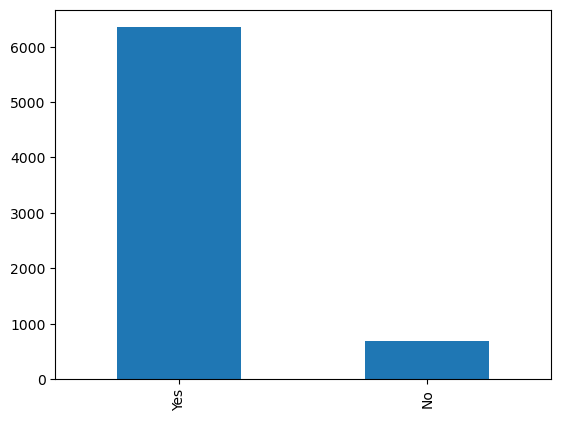

In [48]:
univariant(data["PhoneService"])

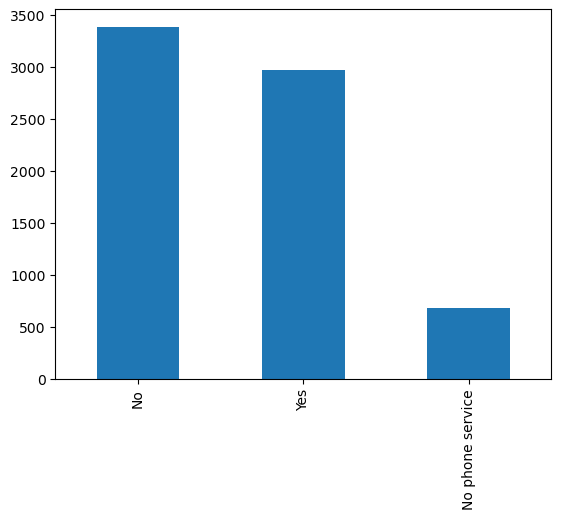

In [49]:
univariant(data["MultipleLines"])

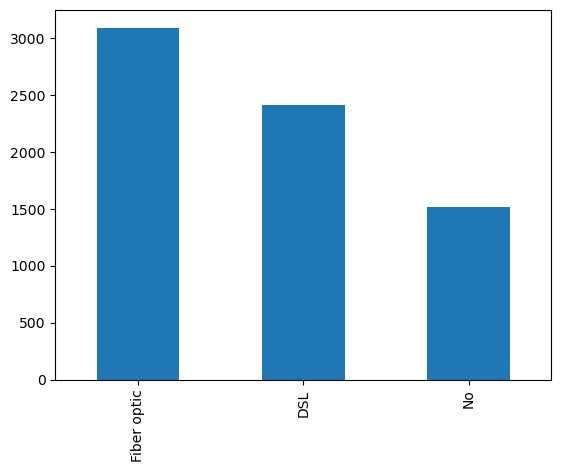

In [50]:
univariant(data["InternetService"])

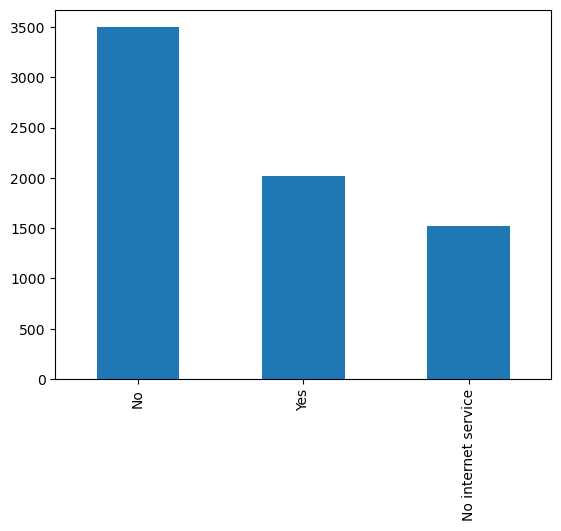

In [51]:
univariant(data["OnlineSecurity"])

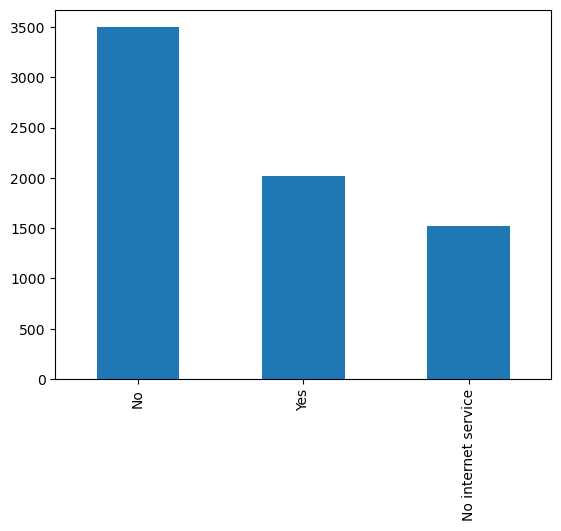

In [52]:
univariant(data["OnlineSecurity"])

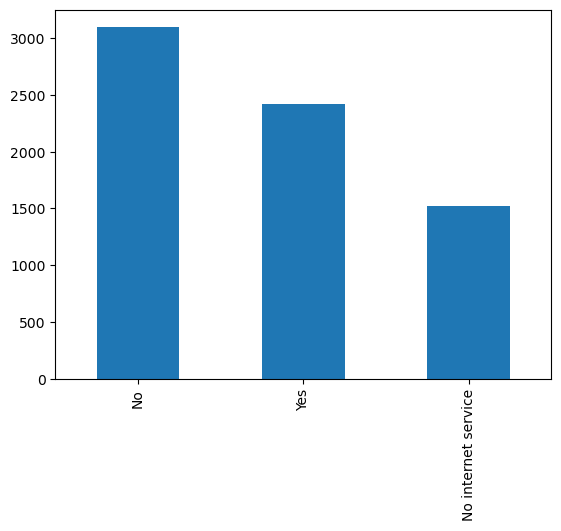

In [53]:
univariant(data['DeviceProtection'])

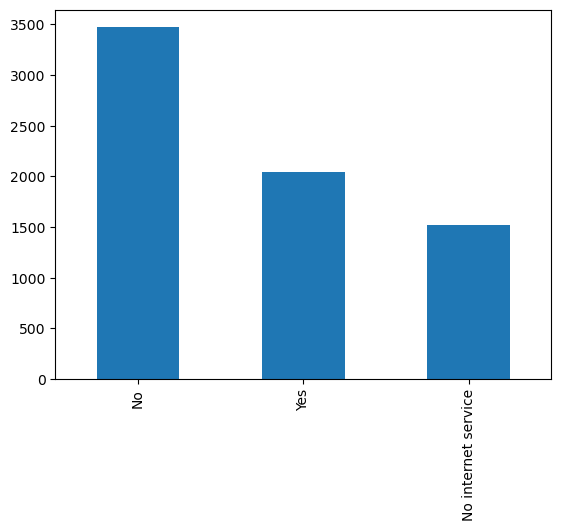

In [54]:
univariant(data["TechSupport"])

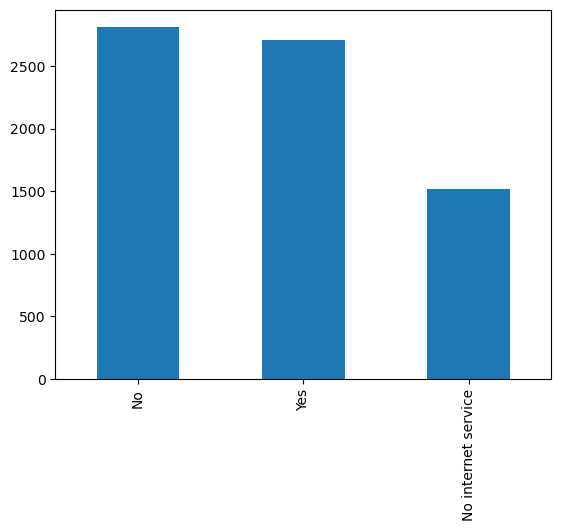

In [55]:
univariant(data['StreamingTV'])

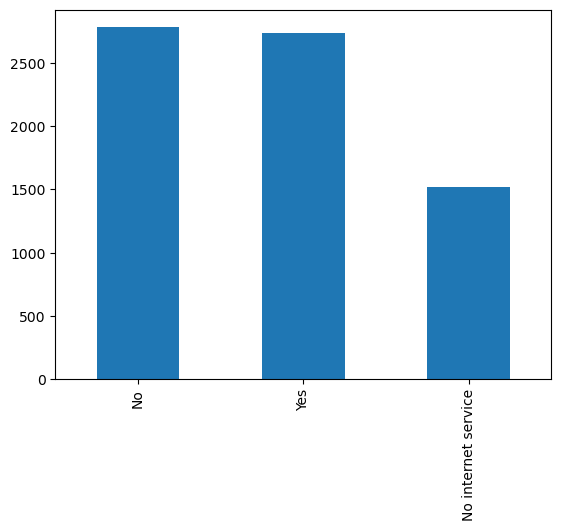

In [56]:
univariant(data['StreamingMovies'])

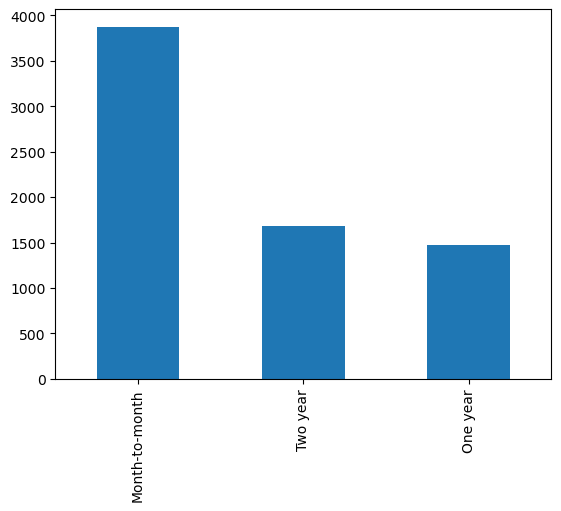

In [57]:
univariant(data['Contract'])

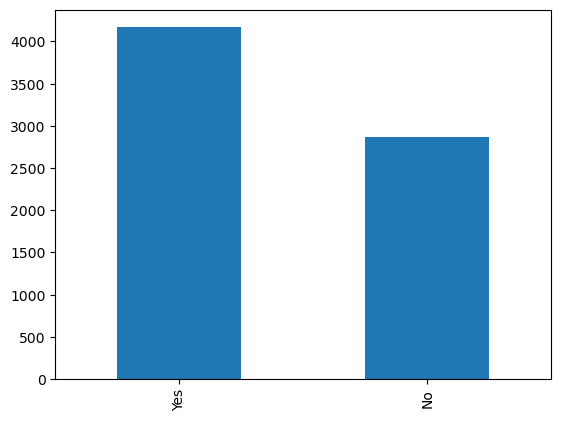

In [58]:
univariant(data['PaperlessBilling'])

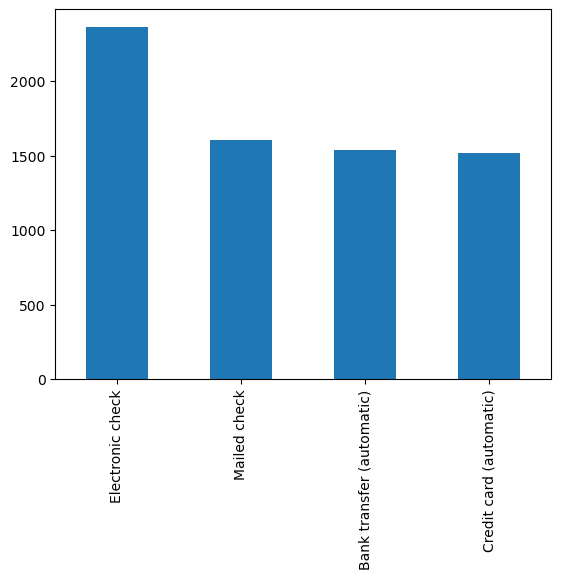

In [59]:
univariant(data['PaymentMethod'])

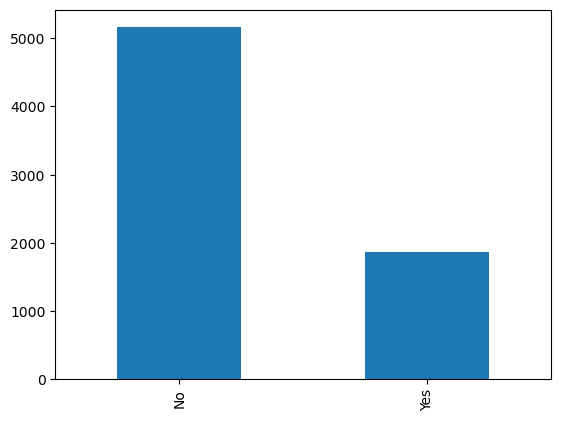

In [60]:
univariant(data['Churn'])

# Bivariant Visualization Anlaysis

In [61]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [63]:
data["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

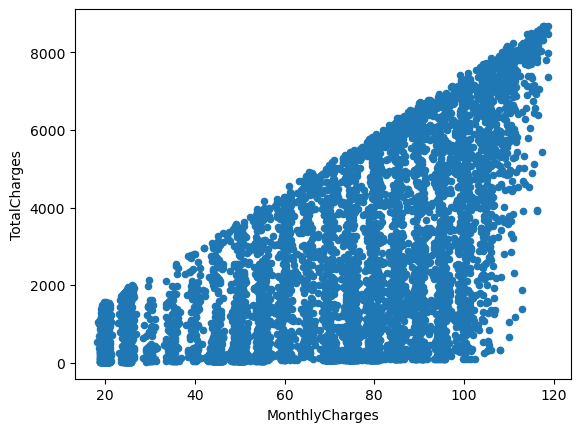

In [64]:
data.plot(x = "MonthlyCharges", y = "TotalCharges",kind = "scatter") 

`Insights :From the above polt we can observe that As the monthly charges increases and total charges also increases so, it is positive relationalship`

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

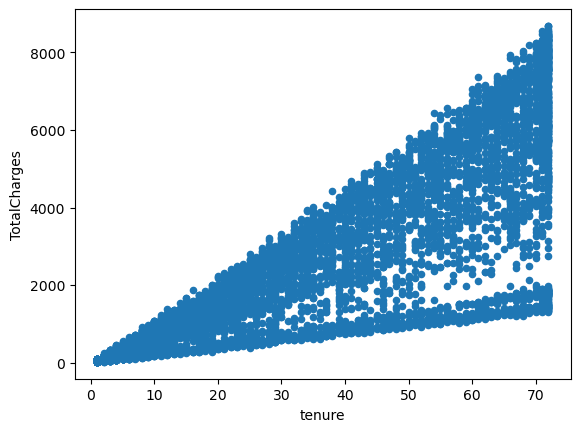

In [66]:
data.plot(x = "tenure", y = "TotalCharges",kind = "scatter")

`Insights :From the above polt we can observe that As the tenure increases and total charges also increases so, it is positive relationalship`

# Numerical V/s Categorical

<AxesSubplot:title={'center':'TotalCharges'}, xlabel='Churn'>

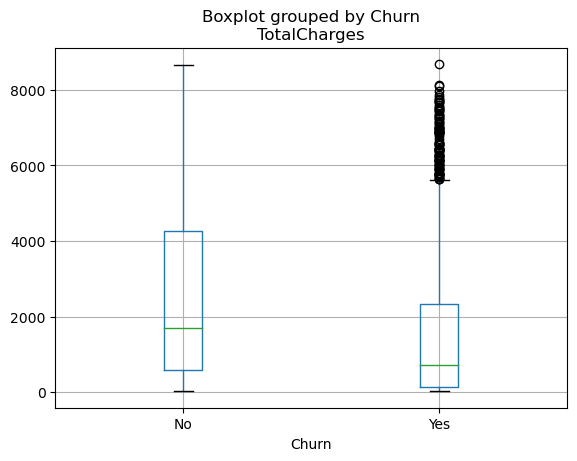

In [68]:
data.boxplot(by = "Churn",column ="TotalCharges")

`Insights :From the above polt we can observe that total charges is more cost so customers are likely to churn beacuse of charges are very expensive`

<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='Churn'>

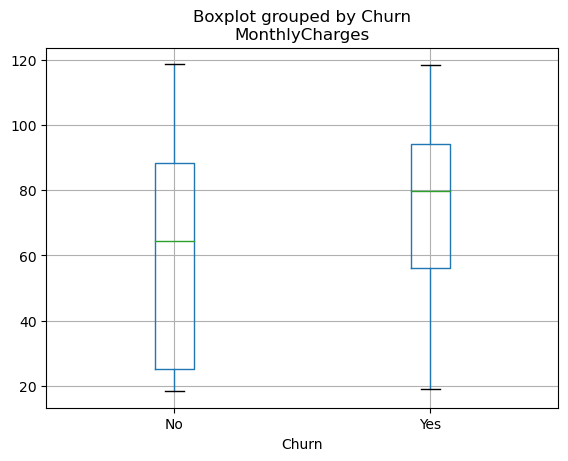

In [70]:
data.boxplot(by = "Churn",column ="MonthlyCharges")

`Insights :From the above polt we can observe monthly charges is more cost so customers are likely to churn beacuse of charges are very expensive`

<AxesSubplot:title={'center':'tenure'}, xlabel='Churn'>

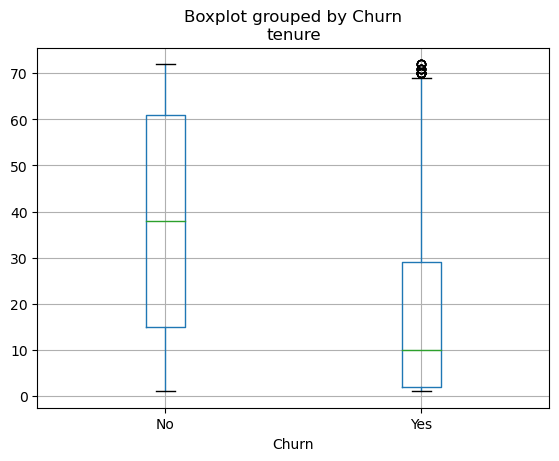

In [72]:
data.boxplot(by = "Churn",column ="tenure")

`Insights :From the above poltwe can observe Most of customer are likey to have no churn compare to yes churn`

# Categorical v/s Categorical

In [76]:
i = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']

In [81]:
def bivariant(i):
    i=pd.crosstab(data[i],data['Churn'])
    i.plot(kind='bar',stacked=True)

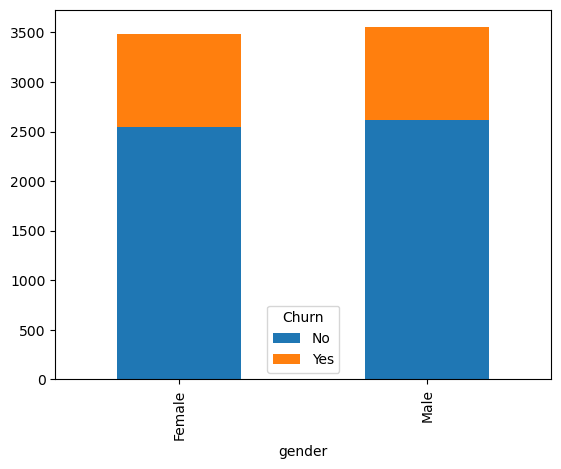

In [82]:
bivariant("gender")

` Insights:From the above polt we can observe that most of males are churn is high`

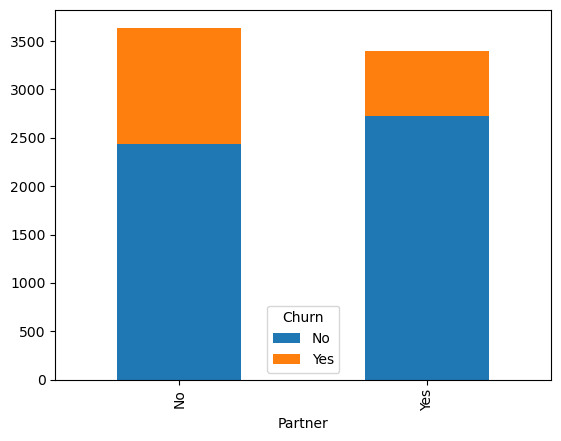

In [84]:
bivariant("Partner")

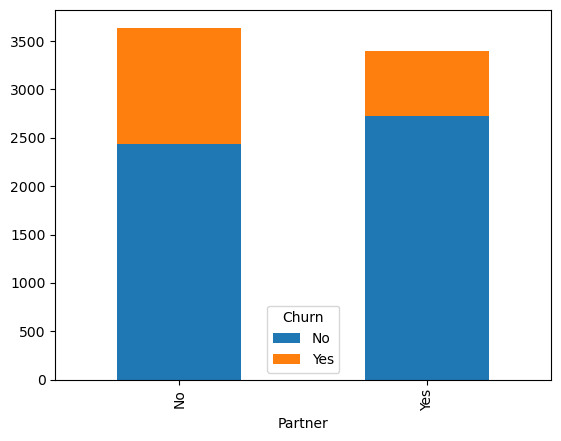

In [85]:
bivariant("Partner")

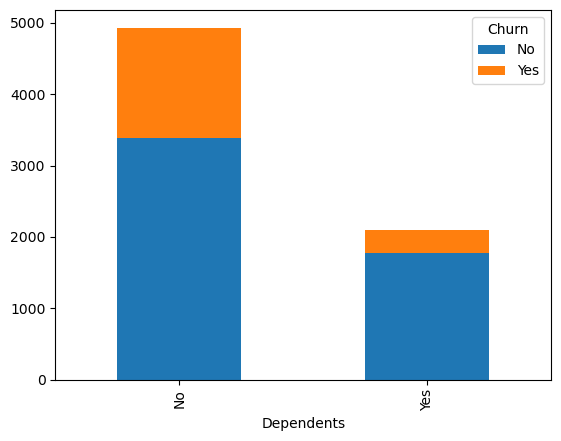

In [86]:
bivariant("Dependents")

`Insights:From the above polt we can observe that most of dependents are has no churn is high.`

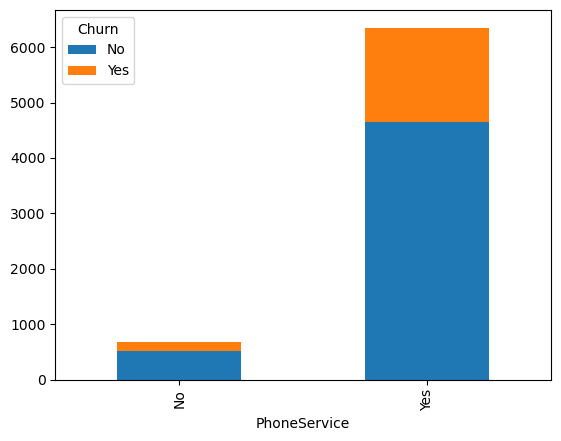

In [88]:
bivariant("PhoneService")

`Insights: From the above polt we can observe that most of phoneservice are yes churn is high.`

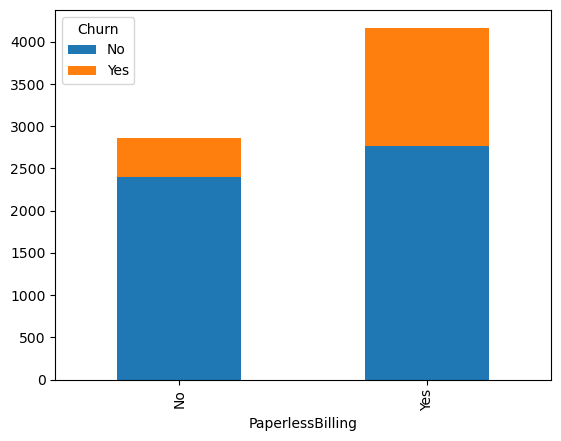

In [90]:
bivariant('PaperlessBilling')

`Insights:From the above polt we can observe that most of customer are likely to paper less billing `

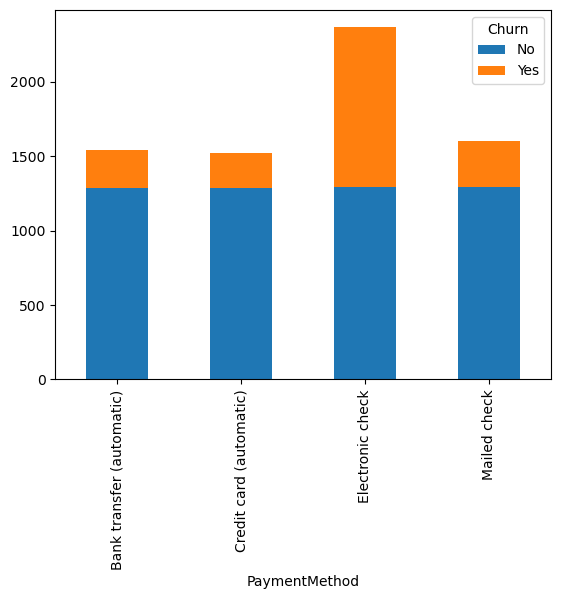

In [92]:
bivariant('PaymentMethod')

`Insights : From the above polt We can observe that most of payment done in electronic mode .`